# Using SGDClassifier

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score




In [0]:
X,Y=make_circles(noise=0.1, factor=0.2, random_state=1)

#Not in use - 
X1 = X[:, 0].flatten()
X2 = X[:, 1].flatten()


#X3 = X1**2  #Adding Feature Square
#X4 = X2**2  #Adding Feature Square
#X5 = X3*X4

#print(X)
#df = pd.DataFrame(X, columns = ['X1', 'X2']) 
#df['X3'] = X3
#df['X4'] = X4
#df['X5'] = X5


#X = df.as_matrix(columns=["X1", "X2", "X3", "X4","X5"])
#print(X)

#Standard Scaler
scaler = StandardScaler()
XS = scaler.fit_transform(X)

#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
PolyFeatures = PolynomialFeatures(2)

X_NEW = PolyFeatures.fit_transform(XS)



In [19]:

#clf = linear_model.SGDClassifier(loss='log',alpha=0,learning_rate='adaptive',eta0=0.01,max_iter=1000)
clf = linear_model.SGDClassifier(loss='log', random_state=123)
#clf = linear_model.SGDClassifier(loss='log')#,penalty=None,alpha=0.00,eta0=0.0001,learning_rate='constant')
#clf.n_iter = np.ceil(10**6 / len(Y))

clf.fit(X_NEW, Y)
predict_Y = clf.predict(X_NEW)
#prob_Y  = clf.predict_proba(X=X) 

success = 1-sum(abs(predict_Y - Y))/len(Y)
print("Hypothesis prediction success rate is %.2f" %success)
print("Classifier Score",clf.score(X_NEW,Y))
print("Accuracy Score", accuracy_score(Y,predict_Y))

Hypothesis prediction success rate is 1.00
Classifier Score 1.0
Accuracy Score 1.0


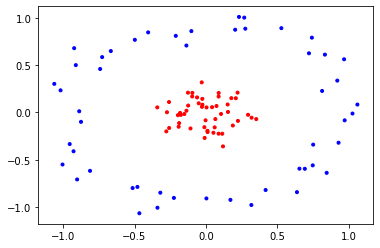

In [20]:
cmap = ListedColormap(['blue', 'red'])                    
plt.scatter(X1,X2, c=predict_Y,marker='.', cmap=cmap)
plt.show()

# Logistic Regression - Classification

In [0]:
def do_fit_logreg(classifier, X, Y):
    classifier.fit(X, Y)
    predict_y1 = classifier.predict(X=X)
    success = 1-sum(abs(predict_y1 - Y))/len(Y)
    print("Hypothesis prediction success rate is %.2f" %success)
    #print(classifier.score(X,Y))
    print(accuracy_score(Y,predict_Y))
    
    cmap = ListedColormap(['blue', 'red'])                    
    plt.scatter(X1,X2, c=predict_y1,marker='.', cmap=cmap)
    plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
logregressor = LogisticRegression(solver="liblinear")
#do_fit_logreg(logregressor, X, Y) 
#https://sdsawtelle.github.io/blog/output/week3-andrew-ng-machine-learning-with-python.html


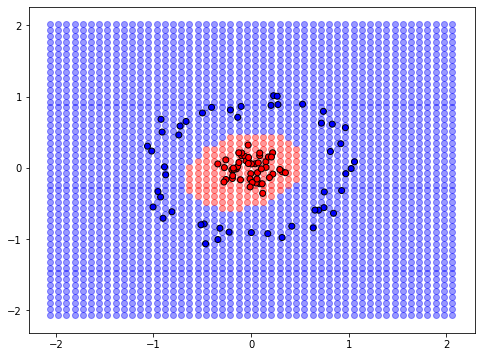

In [23]:
from matplotlib.colors import ListedColormap
myColorMap = ListedColormap(['blue', 'red'])                    

plt.figure(figsize=(8,6))
# Set min and max values and give it some padding
x1_min, x1_max = X[:,0].min() - 1, X[ :,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[ :,1].max() + 1

xx1 =np.linspace(x1_min, x1_max, 50)
xx2 =np.linspace(x2_min, x2_max, 50)
#Plot Prediction Data
for i in range(len(xx1)):
    for j in range(len(xx2)):
        newX=(np.column_stack((xx1[i],xx2[j])))
        #newY=predict(newX, weights) 
        
        
        newY = clf.predict(PolyFeatures.fit_transform(scaler.transform(newX)))
        yColor=myColorMap(int(newY))
        plt.scatter(xx1[i].flatten(),xx2[j].flatten(),color=yColor,alpha=0.4);

#Plot Training data
plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=Y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()